# SLSQP Example

### This code is from a YouTube video titled "Underdetermined systems and compressed sensing [Python] 
##### by Steve Brunton. [link](https://www.youtube.com/watch?v=_-Jkq-Faa2Y&list=PLMrJAkhIeNNRHP5UA-gIimsXLQyHXxRty&index=5)

Jeonghyeop Kim (12/23/2021)

#### L1 vs L2 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize

In [2]:
plt.rcParams['figure.figsize']=[12,18]
plt.rcParams.update({'font.size' : 18})

In [3]:
# Solve y = Theta * s for "s"

n = 1000 # dimension of s
p = 200 # number of measurements, dim(y)

Theta = np.random.randn(p,n) 
y = np.random.randn(p)
#np.random.randn : standard normal distribution

# L1 Minimum norm solution s_L1

def L1_norm(x):
    return np.linalg.norm(x,ord=1)

constr = ({'type' : 'eq', 'fun' : lambda x: Theta @ x - y})
x0 = np.linalg.pinv(Theta) @ y #initialize with L2 solution
res = minimize(L1_norm, x0, method = 'SLSQP', constraints = constr)
s_L1 = res.x


In [4]:
# L2 Minimum norm solution s_L2
s_L2 = np.linalg.pinv(Theta) @ y

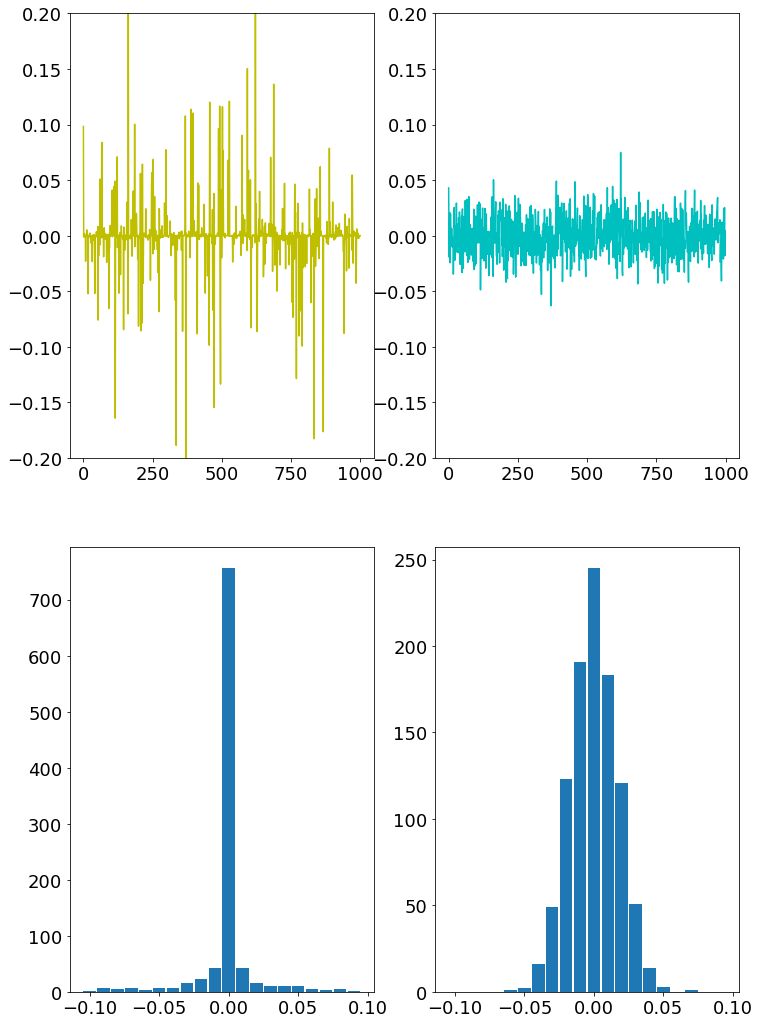

In [19]:
fig,axs = plt.subplots(2,2)
#axs = axs.reshape(-1)
axs[0,0].plot(s_L1,color='y')
axs[0,0].set_ylim(-.2,.2)
axs[0,1].plot(s_L2,color='c')
axs[0,1].set_ylim(-.2,.2)
axs[1,0].hist(s_L1,bins=np.arange(-0.105,0.105,0.01),rwidth=0.9)
axs[1,1].hist(s_L2,bins=np.arange(-0.105,0.105,0.01),rwidth=0.9)

plt.show()